# About The Data
We'll be using the Credit Card Dataset from kaggle for this lab, but feel free to follow along with your own dataset. We will develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables:

CUSTID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases (
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFFPURCHASES : Maximum purchase amount done in one-go
INSTALLMENTSPURCHASES : Amount of purchase done in installment
CASHADVANCE : Cash in advance given by the user
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASESTRX : Numbe of purchase transactions made
CREDITLIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user

# About Hierarchical clustering
Hierarchical clustering is a method which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

Agglomerative : This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
Divisive : This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.
In general, the merges and splits are determined in a greedy manner, and the results of hierarchical clustering are usually presented in a dendrogram.

# Agglomerative Clustering
The algorithm goes as follows:

Compute the proximity matrix
Let each data point be a cluster
Repeat: Merge two closest clusters and update the proximity matrix until 1/ K cluster remains

For example, say we have six data points {a,b,c,d,e,f}

The first step is to determine which elements to merge in a cluster. Usually, we want to take the two closest elements, according to the chosen distance.We construct a distance matrix at this stage, where the number in the i-th row j-th column is the distance between the i-th and j-th elements. Then, as clustering progresses, rows and columns are merged as the clusters are merged and the distances updated.

# Computation of Proximity/Distance Matrix
To calculate the proximity between two clusters, we need to define the distance between them. Usually the distance is one of the following:

The maximum distance between elements of each cluster (also called complete-linkage clustering )
The minimum distance between elements of each cluster (also called single-linkage clustering )
The mean distance between elements of each cluster (also called average linkage clustering )
The sum of all intra-cluster variance.

Note: Euclidean, Manhattan, Mahalanobis, etc. distance formulas can be used when calculating distances for each of the above.

# Implementation
Similarly to the K Means lab, we'll skip the data exploration portion and jump to implementation, but you're welcome to explore this data, or your own if working with a different dataset.

In [1]:
# Importing numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing rcParaams
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
# load the data into a pandas DataFrame
# Drop 'CUST_ID' column
# fill missing values with the mean value of that column
cc_df = pd.read_csv('cc.csv')
cc_df.drop('CUST_ID', axis = 1, inplace = True)
cc_df['MINIMUM_PAYMENTS'].fillna(value = cc_df['MINIMUM_PAYMENTS'].mean(), inplace = True)
cc_df['CREDIT_LIMIT'].fillna(value=cc_df['CREDIT_LIMIT'].mean(), inplace = True)
cc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Checking to see any missing value by calling .isnull().sum()
cc_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
# Importing StandardScaler and normalize
from sklearn.preprocessing import StandardScaler, normalize

# Scaler fit
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(cc_df) 

# Normalized the scaled data
normalized_df = normalize(scaled_df) 

# Converting the scaled data back into a pandas DataFrame 
normalized_df = pd.DataFrame(data=normalized_df) 

In [6]:
# Importing PCA
from sklearn.decomposition import PCA

# reduce the dim of the data by 2
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

# call .head() to return first 5 data
X_principal.head()

,P1,P2
0,-0.489826,-0.679679
1,-0.518791,0.545010
2,0.330885,0.268978
3,-0.482374,-0.092111
4,-0.563289,-0.481915


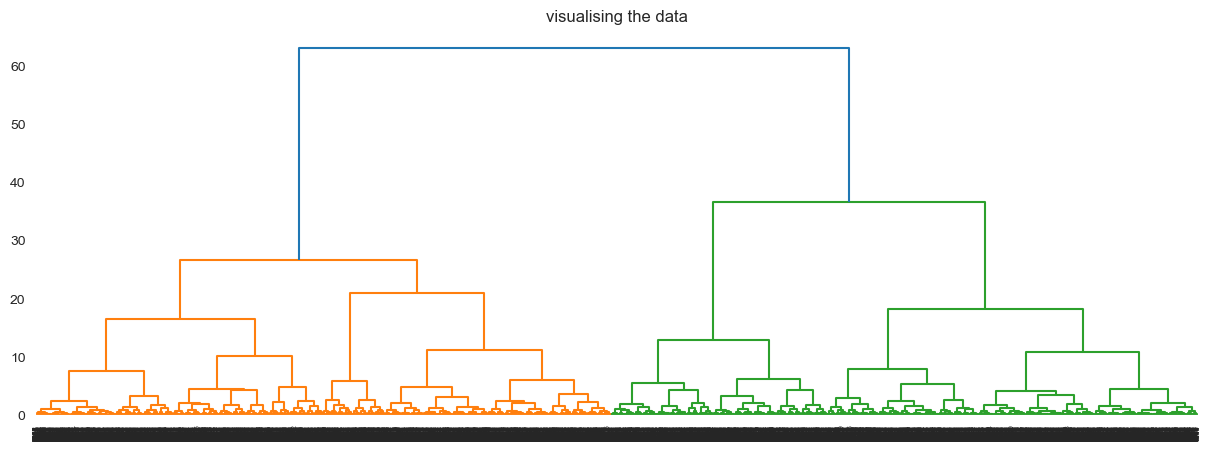

In [7]:
# Importing scipy.cluster.hierarchy
import scipy.cluster.hierarchy as shc

# create a dendrogram with method = 'ward'
plt.title('visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

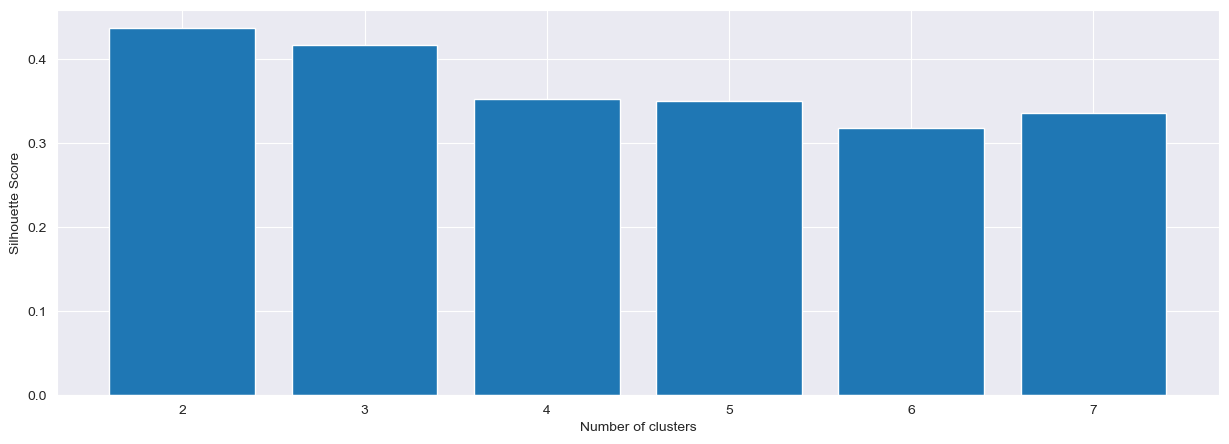

In [8]:
# Importing AgglomerativeClustering and silhouette_score
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

# where we'll save scores for later plotting
silhouette_scores = [] 

# testing different cluster values in range [2,8)
for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(X_principal,
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Creating bar graph to compare the results. You can use a line plot if you prefer (similar to K Means lab)
plt.bar(x=range(2, 8), height=silhouette_scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 


In [9]:
# Build and visualize a clustering model for n_clusters = 3
agg = AgglomerativeClustering(n_clusters = 3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

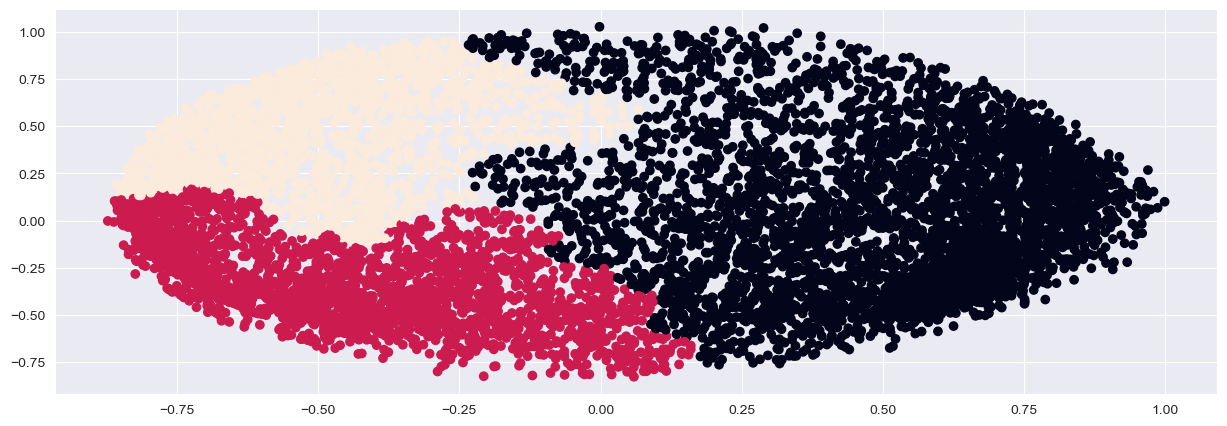

In [10]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal)) 
plt.show() 

Now I use my own data for practice.

In [11]:
# load the data into a pandas DataFrame
# And call .head() to return first 5 data
housing_df = pd.read_csv('housing.csv')
housing_df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [12]:
# call .info() to see any missing value
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [13]:
# Can also Check to see any missing value by calling .isnull().sum()
housing_df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [14]:
# Using StandardScaler
# Scaler fit
scaler2 = StandardScaler() 
scaled_df2 = scaler2.fit_transform(housing_df) 

# Normalized the scaled data
normalized_df2 = normalize(scaled_df2) 

# Converting the scaled data back into a pandas DataFrame 
normalized_df2 = pd.DataFrame(data = normalized_df2) 

In [15]:
# Using PCA to reduce the dim of the data by 2
pca2 = PCA(n_components = 2) 
X_principal2 = pca2.fit_transform(normalized_df2) 
X_principal2 = pd.DataFrame(X_principal2) 
X_principal2.columns = ['P1', 'P2'] 

# call .head() to return first 5 data
X_principal2.head()

,P1,P2
0,0.933799,0.364000
1,0.880262,0.025850
2,0.934540,-0.334810
3,0.869432,-0.480651
4,0.839431,-0.450701


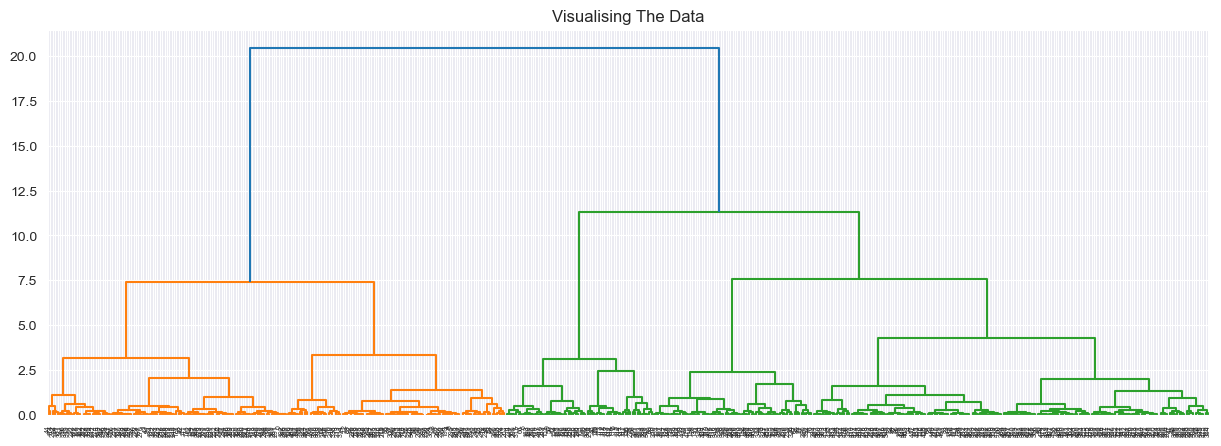

In [16]:
# create a dendrogram with method = 'ward'
plt.title('Visualising The Data') 
Dendrogram2 = shc.dendrogram((shc.linkage(X_principal2, method ='ward')))

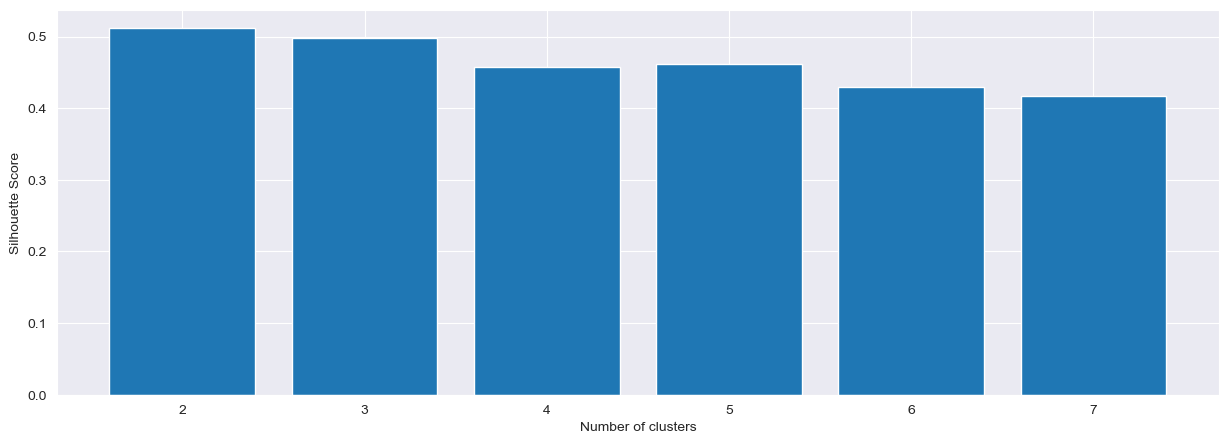

In [17]:
# where we'll save scores for later plotting
silhouette_scores2 = [] 

# testing different cluster values in range [2,8)
for n_cluster2 in range(2, 8):
    silhouette_scores2.append(silhouette_score(X_principal2,
                                              AgglomerativeClustering(n_clusters = n_cluster2).fit_predict(X_principal2))) 
    
# Creating bar graph to compare the results. You can use a line plot if you prefer (similar to K Means lab)
plt.bar(x = range(2, 8), height = silhouette_scores2) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

In [23]:
# Build and visualize a clustering model for n_clusters = 5
agg2 = AgglomerativeClustering(n_clusters = 5)
agg2.fit(X_principal2)

AgglomerativeClustering(n_clusters=5)

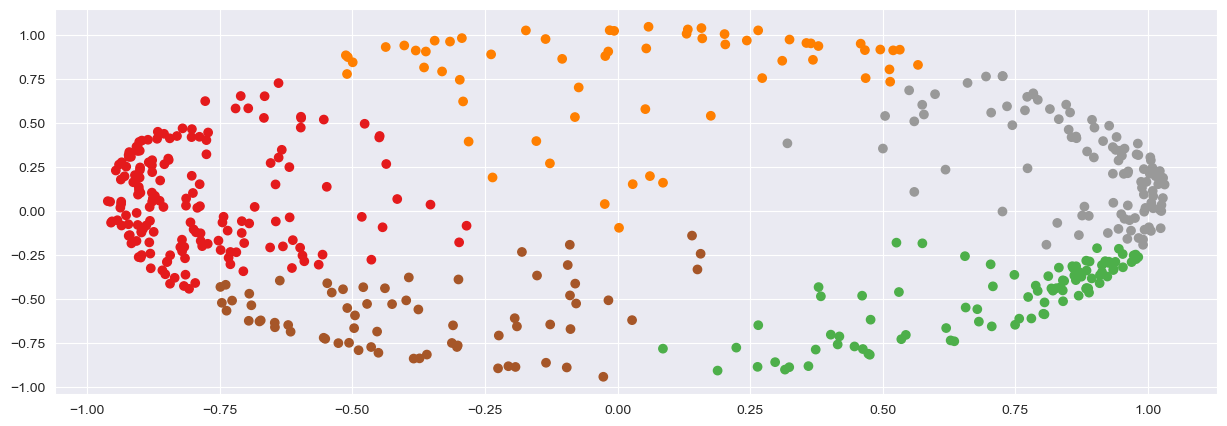

In [24]:
# Visualizing the clustering
# Change colors to Set1
plt.scatter(X_principal2['P1'], X_principal2['P2'],
            c = agg2.fit_predict(X_principal2), cmap = "Set1") 
plt.show() 